In [102]:
library(tidyverse)

In [103]:
arg_raw <- read.csv("final_resistome_matrix.csv", row.names=1, check.names = FALSE)

In [104]:
arg_t <- t(arg_raw)
arg_df <- as.data.frame(arg_t)

In [105]:
# Normalize data to Counts Per Million (CPM) to account for sequencing depth.
arg_cpm <- arg_df %>%
    mutate_all(function (x) (x / sum(x)) * 1e6)
    # if cpm calc is NA then replace with 0
arg_cpm[is.na(arg_cpm)] <- 0

#apply log transformation
arg_log <- log10(arg_cpm + 1)  # Adding 1 to avoid log(0)
    


In [106]:
# calculate total resitome load
total_load <- data.frame(SampleID = rownames(arg_log),
                         Total_Resistome_Load = rowSums(arg_log))

In [107]:
total_load
#write csv
write.csv(total_load, "total_resistome_load.csv", row.names = FALSE)

,SampleID,Total_Resistome_Load
,<chr>,<dbl>
25617X10_S56,25617X10_S56,186.78830
25617X11_S57,25617X11_S57,145.21581
25617X12_S58,25617X12_S58,580.82800
25617X13_S59,25617X13_S59,620.31756
25617X14_S60,25617X14_S60,1147.38738
25617X15_S61,25617X15_S61,727.24588
25617X16_S62,25617X16_S62,1066.99681
25617X17_S63,25617X17_S63,1083.56402
25617X19_S65,25617X19_S65,905.59628


In [108]:
# rename total_load sample ids:
# for 25617 samples just keep everything before the first underscore
# for 9428 samples convert to garrett_<sample number> where sample number is the number after the last underscore
total_load <- total_load %>%
    mutate(SampleID = case_when(
        grepl("^25617X", SampleID) ~ sub("_.*", "", SampleID),
        grepl("^9428", SampleID) ~ paste0("garrett_", sub(".*_(\\d+)$", "\\1", SampleID)),
        TRUE ~ SampleID  # Keep original if neither condition matches
    ))
total_load

,SampleID,Total_Resistome_Load
,<chr>,<dbl>
25617X10_S56,25617X10,186.78830
25617X11_S57,25617X11,145.21581
25617X12_S58,25617X12,580.82800
25617X13_S59,25617X13,620.31756
25617X14_S60,25617X14,1147.38738
25617X15_S61,25617X15,727.24588
25617X16_S62,25617X16,1066.99681
25617X17_S63,25617X17,1083.56402
25617X19_S65,25617X19,905.59628


In [109]:
#write csv
write.csv(total_load, "total_resistome_load_renamed.csv", row.names = FALSE)

In [110]:
# read tsv metadata file
metadata <- read_tsv("sample_metadata.tsv")

Rows: 157 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): sample, donor, tissue, condition, data_origin, sex
dbl (1): day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [111]:
metadata

sample,donor,day,tissue,condition,data_origin,sex
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
garrett_1,g18,0,Fecal,Healthy,garrett,female
garrett_2,g17,0,Fecal,Healthy,garrett,male
garrett_3,g10,0,Fecal,FMT,garrett,female
garrett_4,g3,0,Fecal,FMT,garrett,female
garrett_5,g3,56,Fecal,FMT,garrett,female
garrett_6,g19,14,Fecal,Healthy,garrett,female
garrett_7,g7,56,Fecal,FMT,garrett,male
garrett_8,g12,0,Fecal,FMT,garrett,male
garrett_9,g1,56,Fecal,FMT,garrett,female


In [112]:
# Merge the load data with the metadata for plotting
# The 'Sample_ID' column in load_data now matches 'row.names' in metadata
load_data <- merge(total_load, metadata, by.x = "SampleID", by.y = "sample")

In [113]:
#write csv
write.csv(load_data, "total_resistome_load_with_metadata.csv", row.names = FALSE)

In [114]:
load_data

SampleID,Total_Resistome_Load,donor,day,tissue,condition,data_origin,sex
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
25617X1,755.53252,m22,0,Fecal,Healthy,mary,female
25617X10,186.78830,m26,14,Fecal,FMT,mary,male
25617X11,145.21581,m26,56,Fecal,FMT,mary,male
25617X12,580.82800,m31,0,Fecal,Healthy,mary,male
25617X13,620.31756,m31,14,Fecal,Healthy,mary,male
25617X14,1147.38738,m32,0,Fecal,FMT,mary,female
25617X15,727.24588,m33,0,Fecal,FMT,mary,male
25617X16,1066.99681,m38,0,Fecal,FMT,mary,male
25617X17,1083.56402,m38,14,Fecal,FMT,mary,male


In [115]:
# Plot the Total Resistome Load by Group
load_plot <- ggplot(load_data, aes(x = tissue, y = Total_Resistome_Load, fill = tissue)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.7) +
  labs(
    title = "Total Resistome Load by Sample Group (Log-transformed CPM)",
    y = "Total ARG Abundance (Sum of Log10(CPM + 1))",
    x = "Sample Group"
  ) +
  theme_minimal() +
  theme(legend.position = "none")


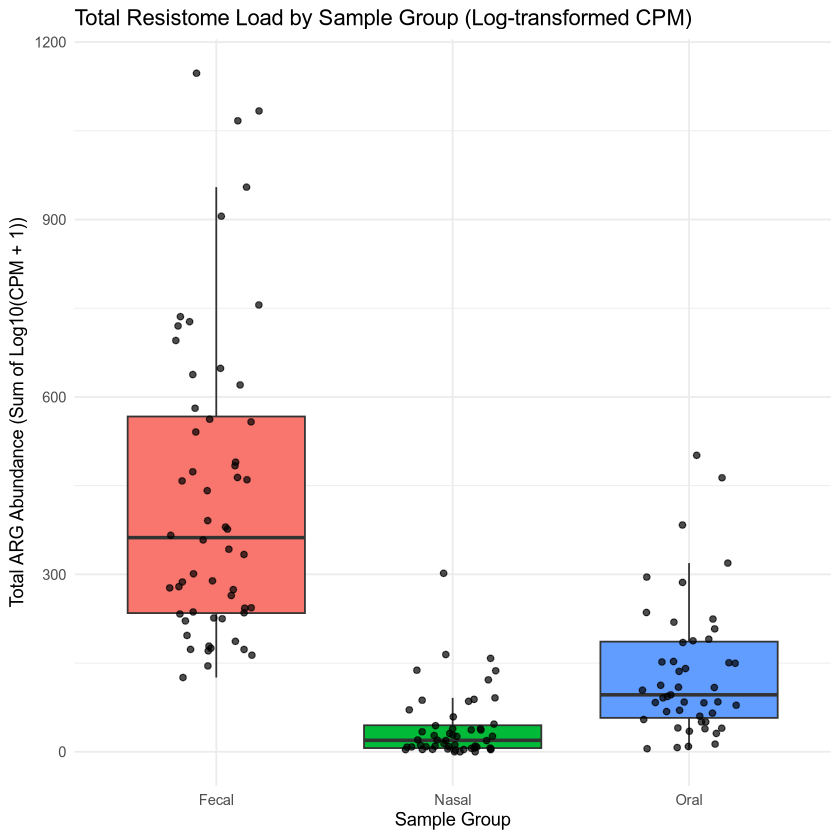

In [116]:
load_plot

In [117]:
# only load fecal data
load_data_fecal <- load_data %>%
    filter(tissue == "Fecal") %>%
    filter(condition == "FMT")

In [118]:
#Plot total resistome by day
load_plot_fecal <- ggplot(load_data_fecal, aes(x = as.factor(day), y = Total_Resistome_Load, fill = as.factor(day))) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.7) +
  labs(
    title = "Total Resistome Load in Fecal Samples Over Time (Log-transformed CPM)",
    y = "Total ARG Abundance (Sum of Log10(CPM + 1))",
    x = "Day"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

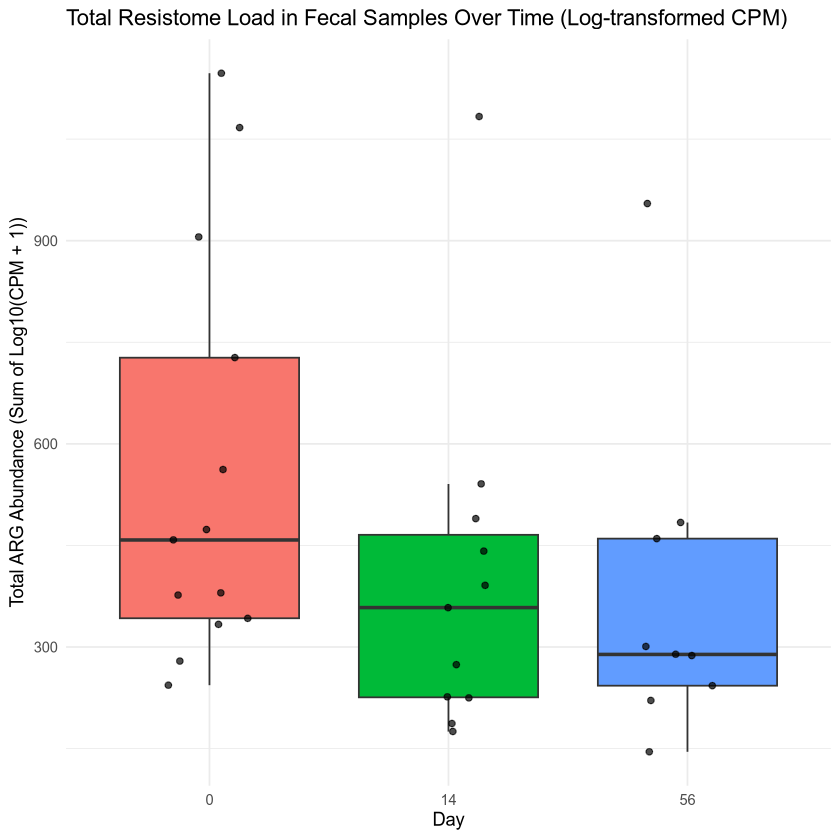

In [119]:
load_plot_fecal

In [120]:
#load nasal data
load_data_nasal <- load_data %>%
    filter(tissue == "Nasal") %>%
    filter(condition == "FMT")

In [121]:
#plot total resistome by day for nasal
load_plot_nasal <- ggplot(load_data_nasal, aes(x = as.factor(day), y = Total_Resistome_Load, fill = as.factor(day))) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha =  0.7) +
  labs(
    title = "Total Resistome Load in Nasal Samples Over Time (Log-transformed CPM)",
    y = "Total ARG Abundance (Sum of Log10(CPM + 1))",
    x = "Day"
  ) +
  theme_minimal() +     
    theme(legend.position = "none")
    

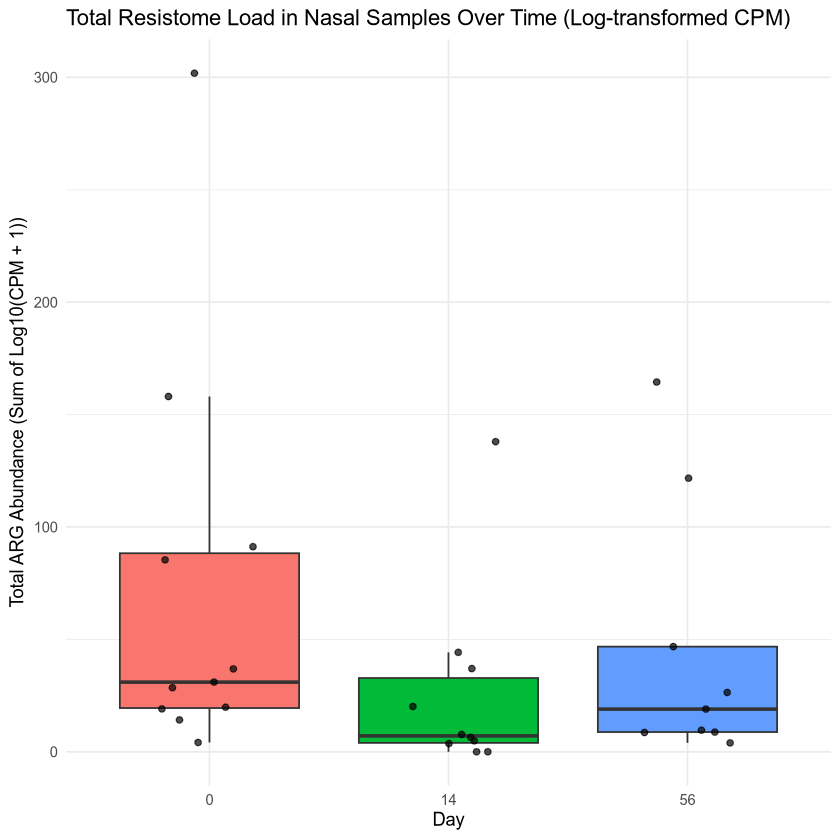

In [122]:
load_plot_nasal

In [123]:
# load oral data
load_data_oral <- load_data %>%
    filter(tissue == "Oral") %>%
    filter(condition == "FMT")    

In [124]:
# plot total resistome by day for oral
load_plot_oral <- ggplot(load_data_oral, aes(x = as.factor(day), y = Total_Resistome_Load, fill = as.factor(day))) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.7) +
  labs(
    title = "Total Resistome Load in Oral Samples Over Time (Log-transformed CPM)",
    y = "Total ARG Abundance (Sum of Log10(CPM + 1))",
    x = "Day"
  ) +
  theme_minimal() +
    theme(legend.position = "none")

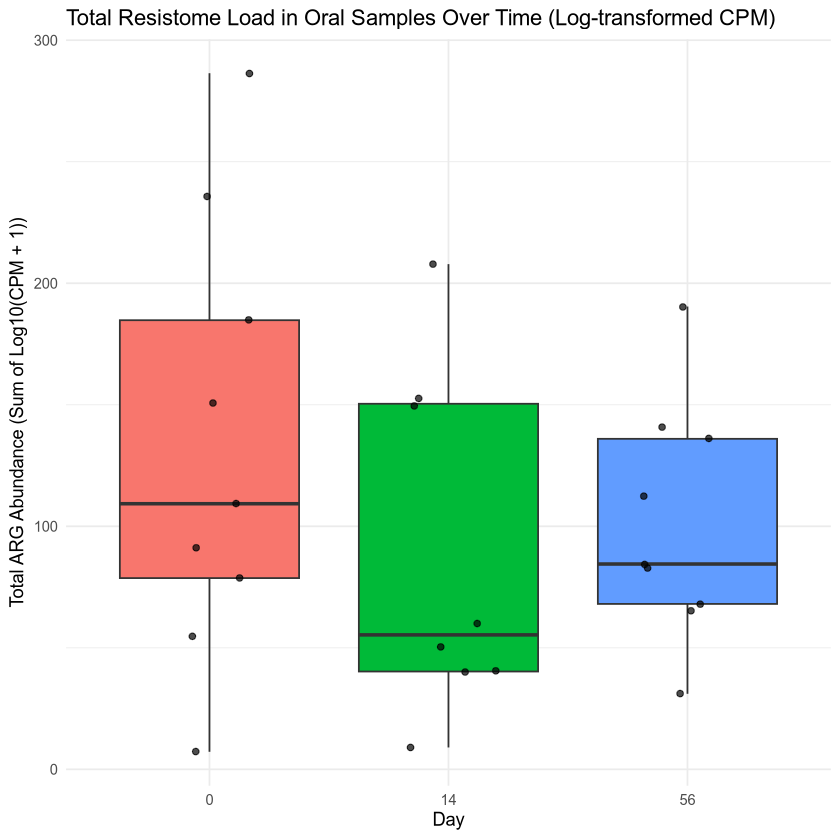

In [125]:
load_plot_oral

In [126]:
library(tidyverse)

# 1. Load your existing ARO matrix
arg_matrix <- read.csv("final_resistome_matrix.csv", row.names = 1)

# 2. Load the drug class mapping
arg_map <- read.csv("arg_class_map.csv")

# 3. Convert matrix to long format
aro_long <- arg_matrix %>%
  rownames_to_column("ARO_Term") %>%
  pivot_longer(cols = -ARO_Term, 
               names_to = "sample_id", 
               values_to = "reads")

# 4. Join with drug class mapping
aro_with_class <- aro_long %>%
  left_join(arg_map, by = c("ARO_Term" = "ARO_Term"))

# 5. Split drug classes (key step!)
aro_by_class <- aro_with_class %>%
  separate_rows(Drug_Class, sep = "; ") %>%
  mutate(Drug_Class = trimws(Drug_Class)) %>%
  # Simplify names
  mutate(Drug_Class = str_remove(Drug_Class, " antibiotic$| beta-lactam$"))

# 6. Sum reads by drug class and sample
drug_class_counts <- aro_by_class %>%
  group_by(Drug_Class, sample_id) %>%
  summarize(total_reads = sum(reads, na.rm = TRUE), .groups = "drop")

# 7. Convert back to matrix format
drug_class_matrix <- drug_class_counts %>%
  pivot_wider(names_from = sample_id, 
              values_from = total_reads, 
              values_fill = 0) %>%
  column_to_rownames("Drug_Class") %>%
  as.matrix()

# 8. Optional: Save the new matrix
write.csv(drug_class_matrix, "drug_class_counts_matrix.csv")

# 9. Log-transform for heatmap
drug_class_matrix_log <- log10(drug_class_matrix + 1)


In [127]:
# get rid of the first X in column names of drug_class_matrix_log
colnames(drug_class_matrix_log) <- ifelse(grepl("^X25617", colnames(drug_class_matrix_log)),
                                          sub("^X", "", colnames(drug_class_matrix_log)),
                                          ifelse(grepl("^X9428", colnames(drug_class_matrix_log)),
                                                 sub("^X", "", colnames(drug_class_matrix_log)),
                                                 colnames(drug_class_matrix_log)))  # Keep original if neither pattern matches

In [128]:
# for 25617 samples just keep everything before the first underscore
# for 9428 samples convert to garrett_<sample number> where sample number is the number after the last underscore
colnames(drug_class_matrix_log) <- ifelse(grepl("^25617X", colnames(drug_class_matrix_log)),
                                          sub("_.*", "", colnames(drug_class_matrix_log)),
                                          ifelse(grepl("^9428", colnames(drug_class_matrix_log)),
                                                 paste0("garrett_", sub(".*_(\\d+)$", "\\1", colnames(drug_class_matrix_log))),
                                                 colnames(drug_class_matrix_log)))  # Keep original if neither pattern matches

In [129]:
drug_class_matrix_log

,25617X10,25617X11,25617X12,25617X13,25617X14,25617X15,25617X16,25617X17,25617X19,25617X1,⋯,garrett_88,garrett_89,garrett_9,garrett_90,garrett_91,garrett_92,garrett_93,garrett_94,garrett_95,garrett_96
,0.0000000,0.0000000,0.0000000,0.000000,2.863323,0.0000000,0.000000,0.000000,2.5843312,0.301030,⋯,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,0.0000000
aminocoumarin,1.2041200,0.6989700,0.0000000,0.000000,4.413233,1.5563025,3.914925,3.828595,4.3869268,1.579784,⋯,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,0.0000000
aminoglycoside,0.8450980,1.2552725,2.7737864,2.787460,4.334554,2.8082110,3.909342,3.855398,4.3037143,3.063333,⋯,0.4771213,0.0000000,1.8061800,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,1.0000000
antibacterial free fatty acids,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,0.0000000
antibiotic without defined classification,0.0000000,0.0000000,0.0000000,0.301030,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,0.0000000
bicyclomycin-like,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,0.0000000
carbapenem,1.0791812,0.6020600,2.0413927,1.929419,4.469100,2.3856063,3.410271,3.278982,3.9318137,2.170262,⋯,0.4771213,0.4771213,1.3424227,0,0.0000000,0.4771213,0.00000,0.30103,0.0000000,0.0000000
cephalosporin,1.5563025,1.3802112,2.9148718,2.640481,4.675155,2.7839036,4.079904,4.098332,4.5161650,2.933487,⋯,0.6989700,0.6989700,2.3159703,0,0.0000000,0.0000000,0.00000,0.30103,1.4313638,1.8129134
diaminopyrimidine,0.9030900,1.3010300,2.8061800,2.752048,4.172048,1.2304489,1.230449,2.235528,3.4356851,2.998695,⋯,0.0000000,0.0000000,1.7923917,0,0.0000000,0.0000000,0.00000,0.00000,0.0000000,0.0000000
disinfecting agents and antiseptics,1.1139434,0.9030900,1.0413927,0.000000,4.409849,1.9867717,4.094506,3.989628,4.5155029,1.959041,⋯,0.4771213,0.0000000,1.4771213,0,0.0000000,0.4771213,0.00000,0.00000,0.0000000,0.7781513


In [130]:
#write csv
write.csv(drug_class_matrix_log, "all_drug_class_matrix_log_transformed.csv")

In [131]:
# keep only the top 25 drug classes by mean abundance
top_25_classes <- drug_class_matrix_log %>%
  rowMeans() %>%
  sort(decreasing = TRUE) %>%
  head(25) %>%
  names()
drug_class_matrix_log_top25 <- drug_class_matrix_log[top_25_classes, ]

In [132]:
#write csv
write.csv(drug_class_matrix_log_top25, "top_25_drug_class_matrix_log_transformed.csv")

In [133]:
library(pheatmap)
# Order samples by Condition first, then DAY, then donor
metadata_sorted <- metadata %>%
  # filter only fecal samples
  filter(tissue == "Fecal") %>%
  arrange(condition, day, donor)  # Added condition first

common_samples <- intersect(colnames(drug_class_matrix_log_top25), metadata_sorted$sample)
print(paste("Number of common samples:", length(common_samples)))
drug_class_matrix_log_subset <- drug_class_matrix_log_top25[, common_samples]
metadata_sorted <- metadata_sorted %>%
  filter(sample %in% common_samples)

# Reorder matrix
drug_class_matrix_log_sorted <- drug_class_matrix_log_subset[, metadata_sorted$sample]
# Order rows by abundance (most to least abundant)
# row_order <- order(rowMeans(drug_class_matrix_log_sorted), decreasing = TRUE)
# drug_class_matrix_log_sorted <- drug_class_matrix_log_sorted[row_order, ]

# Prepare annotation dataframe
anno_df <- data.frame(
  Tissue = metadata_sorted$tissue,
  Day = factor(metadata_sorted$day),
  Donor = metadata_sorted$donor,
  Condition = metadata_sorted$condition,
  row.names = metadata_sorted$sample
)

# Define colors (including donor colors)
# Create a color palette for donors
n_donors <- length(unique(metadata_sorted$donor))
donor_colors <- setNames(
  rainbow(n_donors),  # Or use a better palette
  sort(unique(metadata_sorted$donor))
)

# Define annotation colors
anno_colors <- list(
  Tissue = c(Fecal = 'brown', Oral = 'lightblue', Nasal = 'yellow'),
  Donor = donor_colors, 
  Day = c('0'='white', '14' = 'grey', '56' = 'black'),
  Condition = c(FMT = "purple", Healthy = "green")
)

# Create heatmap with clustering turned OFF for columns
pheatmap(
  drug_class_matrix_log_sorted,  # Use sorted matrix
  annotation_col = anno_df,
  annotation_colors = anno_colors,
  show_colnames = FALSE,
  show_rownames = TRUE,
  fontsize_row = 9,
  clustering_distance_rows = "euclidean",
  cluster_cols = FALSE,  # Turn off column clustering to maintain your order
  #cluster_rows = FALSE,
  clustering_method = "complete",
  color = colorRampPalette(c("white", "pink", "red"))(100),
  main = "AMR Gene Profiles by Drug Class (Fecal)",
  filename = "Fecal_AMR_Heatmap_pheatmap.png",
  width = 12,
  height = 8
)

[1] "Number of common samples: 56"


In [134]:
library(pheatmap)
# Order samples by Condition first, then DAY, then donor
metadata_sorted <- metadata %>%
  # filter only fecal samples
  filter(tissue == "Nasal") %>%
  arrange(condition, day, donor)  # Added condition first

common_samples <- intersect(colnames(drug_class_matrix_log_top25), metadata_sorted$sample)
print(paste("Number of common samples:", length(common_samples)))
drug_class_matrix_log_subset <- drug_class_matrix_log_top25[, common_samples]
metadata_sorted <- metadata_sorted %>%
  filter(sample %in% common_samples)

# Reorder matrix
drug_class_matrix_log_sorted <- drug_class_matrix_log_subset[, metadata_sorted$sample]
# Order rows by abundance (most to least abundant)
# row_order <- order(rowMeans(drug_class_matrix_log_sorted), decreasing = TRUE)
# drug_class_matrix_log_sorted <- drug_class_matrix_log_sorted[row_order, ]

# Prepare annotation dataframe
anno_df <- data.frame(
  Tissue = metadata_sorted$tissue,
  Day = factor(metadata_sorted$day),
  Donor = metadata_sorted$donor,
  Condition = metadata_sorted$condition,
  row.names = metadata_sorted$sample
)

# Define colors (including donor colors)
# Create a color palette for donors
n_donors <- length(unique(metadata_sorted$donor))
donor_colors <- setNames(
  rainbow(n_donors),  # Or use a better palette
  sort(unique(metadata_sorted$donor))
)

# Define annotation colors
anno_colors <- list(
  Tissue = c(Fecal = 'brown', Oral = 'lightblue', Nasal = 'yellow'),
  Donor = donor_colors, 
  Day = c('0'='white', '14' = 'grey', '56' = 'black'),
  Condition = c(FMT = "purple", Healthy = "green")
)

# Create heatmap with clustering turned OFF for columns
pheatmap(
  drug_class_matrix_log_sorted,  # Use sorted matrix
  annotation_col = anno_df,
  annotation_colors = anno_colors,
  show_colnames = FALSE,
  show_rownames = TRUE,
  fontsize_row = 9,
  clustering_distance_rows = "euclidean",
  cluster_cols = FALSE,  # Turn off column clustering to maintain your order
  #cluster_rows = FALSE,
  clustering_method = "complete",
  color = colorRampPalette(c("white", "pink", "red"))(100),
  main = "AMR Gene Profiles by Drug Class (Nasal)",
  filename = "Nasal_AMR_Heatmap_pheatmap.png",
  width = 12,
  height = 8
)

[1] "Number of common samples: 52"


In [135]:
library(pheatmap)
# Order samples by Condition first, then DAY, then donor
metadata_sorted <- metadata %>%
  # filter only fecal samples
  filter(tissue == "Oral") %>%
  arrange(condition, day, donor)  # Added condition first

common_samples <- intersect(colnames(drug_class_matrix_log_top25), metadata_sorted$sample)
print(paste("Number of common samples:", length(common_samples)))
drug_class_matrix_log_subset <- drug_class_matrix_log_top25[, common_samples]
metadata_sorted <- metadata_sorted %>%
  filter(sample %in% common_samples)

# Reorder matrix
drug_class_matrix_log_sorted <- drug_class_matrix_log_subset[, metadata_sorted$sample]
# Order rows by abundance (most to least abundant)
# row_order <- order(rowMeans(drug_class_matrix_log_sorted), decreasing = TRUE)
# drug_class_matrix_log_sorted <- drug_class_matrix_log_sorted[row_order, ]

# Prepare annotation dataframe
anno_df <- data.frame(
  Tissue = metadata_sorted$tissue,
  Day = factor(metadata_sorted$day),
  Donor = metadata_sorted$donor,
  Condition = metadata_sorted$condition,
  row.names = metadata_sorted$sample
)

# Define colors (including donor colors)
# Create a color palette for donors
n_donors <- length(unique(metadata_sorted$donor))
donor_colors <- setNames(
  rainbow(n_donors),  # Or use a better palette
  sort(unique(metadata_sorted$donor))
)

# Define annotation colors
anno_colors <- list(
  Tissue = c(Fecal = 'brown', Oral = 'lightblue', Nasal = 'yellow'),
  Donor = donor_colors, 
  Day = c('0'='white', '14' = 'grey', '56' = 'black'),
  Condition = c(FMT = "purple", Healthy = "green")
)

# Create heatmap with clustering turned OFF for columns
pheatmap(
  drug_class_matrix_log_sorted,  # Use sorted matrix
  annotation_col = anno_df,
  annotation_colors = anno_colors,
  show_colnames = FALSE,
  show_rownames = TRUE,
  fontsize_row = 9,
  clustering_distance_rows = "euclidean",
  cluster_cols = FALSE,  # Turn off column clustering to maintain your order
  #cluster_rows = FALSE,
  clustering_method = "complete",
  color = colorRampPalette(c("white", "pink", "red"))(100),
  main = "AMR Gene Profiles by Drug Class (Oral)",
  filename = "Oral_AMR_Heatmap_pheatmap.png",
  width = 12,
  height = 8
)

[1] "Number of common samples: 47"
